# Morphological Image Processing

## Preliminaries

1. The **reflection** of a set $B$ is defined as:

$$ \hat{B} \triangleq \{ -b | b \in B \}$$

2. The **translation** of a set $B$ by point $z$ is defined as:

$$ (B)_z \triangleq \{ b + z | b \in B\}$$

3. A **Structuring Element** is a small set or a subimage used to probe an image under study for properties of interest.
  * In addition to its elements, its origin must be specified. Otherwise, reflection and translation on it are
  ambiguous.
  * When the SE is symmetric and its origin is the symmetric center, the origin can be omitted.

## Erosion and Dilation

### Dilation

The **dilation** of $A$ by $B$ is defined as:

$$ A \oplus B \triangleq \{ a + b | a \in A, b \in B\} $$

That is, the dilation of $A$ by $B$ is just the union of translations of $A$ by every point in $B$, i.e.:

$$ A \oplus B = \bigcup_{b \in B}(A)_b $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
import sys

sys.path.append('../')

In [3]:
from utils import bimshow

In [28]:
a = np.zeros((20, 20), dtype=np.uint8)
for i in range(20):
    for j in range(20):
        if (i - 15)**2 + (j - 15)**2 <= 25:
            a[i, j] = 1

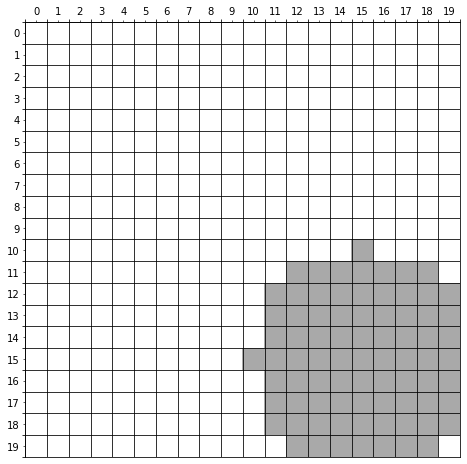

In [29]:
bimshow(a, figsize=(8, 8))

In [62]:
kernel = np.zeros((3, 3), dtype=np.uint8)
kernel[0, :] = 1
kernel[1, 1] = 1
kernel

array([[1, 1, 1],
       [0, 1, 0],
       [0, 0, 0]], dtype=uint8)

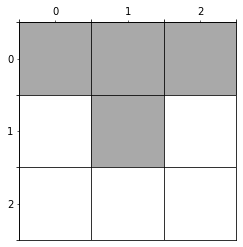

In [63]:
bimshow(kernel)

In [64]:
axt = np.expand_dims(np.transpose(np.nonzero(a)), axis=0)
kxt = np.expand_dims(np.transpose(np.nonzero(kernel)) - (1, 1), axis=1)

print(axt.shape)
print(kxt.shape)

(1, 79, 2)
(4, 1, 2)


In [65]:
idx = (axt + kxt).reshape((-1, 2))

legal_idx = idx[np.apply_along_axis(legal, 1, idx)]
legal_idx.shape

(309, 2)

In [66]:
target = np.zeros_like(a)

In [35]:
def legal(p):
    return p[0] < 20 and p[1] < 20

In [67]:
target[legal_idx[:, 0], legal_idx[:, 1]] = 1

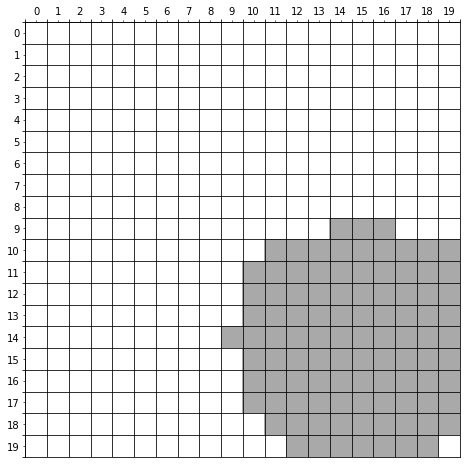

In [68]:
bimshow(target, figsize=(8, 8))

### Erosion

The **erosion** of $A$ by $B$ is defined as:

$$ A \ominus B \triangleq \{z | (B)_z \subseteq A\}$$

## Opening and Closing

## Hit-or-Miss Transformation

## Some Basic Morphological Algorithms

## Gray-scale Morphology